In [22]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [23]:
mnist = keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [25]:
model = ker.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation="softmax")
])

In [27]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [29]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3248 - acc: 0.9179
Epoch 2/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3201 - acc: 0.9198
Epoch 3/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3108 - acc: 0.9191
Epoch 4/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3089 - acc: 0.9214
Epoch 5/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3025 - acc: 0.9232
Epoch 6/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3060 - acc: 0.9230
Epoch 7/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2990 - acc: 0.9248
Epoch 8/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3027 - acc: 0.9250
Epoch 9/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2855 - acc: 0.9276
Epoch 10/20
60000/60000 [==============================] - 3s 56us/sample - loss: 

In [30]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.3977 - acc: 0.9490


[0.39768614881001413, 0.949]

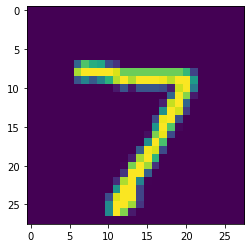

In [33]:
plt.imshow(x_test[0])

In [41]:
model.predict_classes([[x_test[0]]])

array([7], dtype=int64)

### Using Scaling

In [44]:
model_scaled = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(62,activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10,activation="softmax")
])

In [47]:
model_scaled.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [52]:
scaled_X = np.ceil(x_train.copy()/255)
scaled_Y = np.ceil(y_train.copy()/255)
scaled_x = np.ceil(x_test.copy()/255)
scaled_y = np.ceil(y_test.copy()/255)

In [ ]:
model_scaled.fit(scaled_X,scaled_Y,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0146 - acc: 0.9952
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0109 - acc: 0.9964
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0086 - acc: 0.9971
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0068 - acc: 0.9976
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0056 - acc: 0.9979
Epoch 6/10
52256/60000 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.9983

In [ ]:
model_scaled.evaluate(scaled_x,scaled_y)